# Dynamic Modulus Master Curve for Hot Mix Asphalt (HMA)
## Name: Armin Motahari (arminm@ksu.edu)
## Semester: Spring 2020
## Project Area: Civil Engineering

***
## Background 

Dynamic Modulus, (E) is a complex parameter that relates stress to strain of a linear viscoelastic material as a function of loading rate and temperature. It Describes how the stiffness of HMA mixtures varies over a range of service temperatures and loading traffic rates.

Dynamic Modulus master Curves are being constructed based on the time-temperature superposition concept. Collecting data for various temperatures and loading frequencies, producing a smooth single master curve. This program is used in conjunction with the Simple Performance Test System to develop dynamic modulus master curves.  It has the capability to solve a modified version of the Mechanistic-Empirical Design Guide master curve equation, Equation 1.

<p style="font-family: times, serif; font-size:14pt; font-style:italic">
     log E = $\frac{(log(Emax)-Log(Emin))}{1+e^(\beta+\gamma logw_r)}$ (Equation. 1)
</p>

where: 

E = Dynamic Modulus (1/psi)

w$_r$ = Reduced Frequency at the reference temprature, (Hz)

Emax = Limiting Maximum Modulus, psi

Emin = Limiting Minimum Modulus, psi

$\beta$, and $\gamma$ : Fitting Parameters

## Objective
 
The Objective is to solve a "modified version of the Mechanistic-Empirical Design Guide master curve equation". This program reads directly the raw output data related to a series of tests performed for a single Hot Mix Asphalt Material from extracted .csv files. and reports all the required results in Tables 1 & 2 and Figures 1 & 2, including Dynamic modulus lab values at defined test temperatures and frequencies, and also Dynamic modulus Master Curve Values at selected reference temprature and reduced frequencies.

## An overview of program workflow
First, laboratory values of Dynamic Modulus (E) in three different tempratures (Usually 4, 21, and 37 Celsius degrees) , and three different frequencies (Usually 0.1, 1.0, and 10.0 Hz) are read from CSV. files. 

On the other hand, theoretically, ٍequation 1 is established for measuring E. This program finds fitting parameters values Using an optimization function so that with optimized generated fitting parameters the difference between theoretical and laboratory values of dynamic modulus becomes minimal.

To draw the final master curve, the laboratory values are shifted using shift factors (Equations 2a and 2b), from the tested temperatures curves, to the reference temperature curve, as well as from the tested frequencies to the reduced frequencies.

<p style="font-family: times, serif; font-size:14pt; font-style:italic">
     logw$_r$ = logw + loga(T) (Equation. 2a)
</p>
<p style="font-family: times, serif; font-size:14pt; font-style:italic">
     loga(T) = $\frac{EA}{19.14714}$ ($\frac{1}{T}$ - $\frac{1}{T_r}$)  (Equation. 2b)
</p>

where: 

a(T) = shift factor at temperature T

w = loading frequency at the test temperature

T$_r$ = reference temperature

T = test temperature

EA = activation energy (treated as a fitting parameter)

Finally, the master curve can be completed using Equation 1, with optimized fit parameters for any arbitrary range of frequencies.
***
## References

(1) Standard Test Method for Dynamic Modulus of Asphalt Concrete Mixtures. National Cooperative Highway Research Program 1-37A Provisional Test Method DM-1, Arizona State University, June 2002. 

(2) Huang, Y. H. (1993). Pavement analysis and design.
***


In [44]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Temperatures and Frequencies
Specify performed tests and reference temperatures and also desired frequencies for calculations.

In [45]:
# Define low temprature
temp1 = 4

# Define Moderate temprature
temp2 = 21

# Define High Temp
temp3 = 37

# Define Reference Temprature for master curve
ref_temp = 18

# Define three Desired frequencies to read from csv files
freq = ['0.1 Hz', '1 Hz', '10 Hz']

### Processfile Function
This Function reads the csv output files. It skips the additinal lines which are not required for goals of this program, and finds laboratorial Dynamic Modulus values in frequensies which are defined above. For each temperature and frequency we have three Dynamic Modulus values. Using a lambda function, these values can be averaged and converted from 1/kPa to 1/psi. 



In [46]:
def processfile(filename1, filename2, filename3, freq):
    
    # Skip extra lines up to line no.27 to reach to Dynamic Modulus values
    i= 27
    
    
    # Read Dynamic modulus values from csv files
    df_test1 = pd.read_csv(filename1, skiprows= i , encoding= 'unicode_escape')
    df_test2 = pd.read_csv(filename2, skiprows= i , encoding= 'unicode_escape')
    df_test3 = pd.read_csv(filename3, skiprows= i , encoding= 'unicode_escape')
    
    # Find Dynamic modulus test values in three defined frequencies
    E_temp1_1=df_test1.loc[[0], freq ]
    E_temp1_2=df_test2.loc[[0], freq ]
    E_temp1_3=df_test3.loc[[0], freq ]
    
    # Arrange Dynamic modulus test values in an array-like structure 
    E_temp1_1_array=np.array(E_temp1_1)
    E_temp1_2_array=np.array(E_temp1_2) 
    E_temp1_3_array=np.array(E_temp1_3) 
    
    # Average Dynamic modulus test values and convert from 1/kPa to 1/psi
    lab_E_output_psi = lambda E1,E2,E3: (np.array(E1) + np.array(E2) + np.array(E3))/3 * 0.145 

    # List of Dynamic Modulus values for each temperature in three frequencies
    E_temp = lab_E_output_psi(E_temp1_1_array, E_temp1_2_array, E_temp1_3_array)
    return E_temp;



### Test Outputs
Copy/Paste the file names which the program is going to read Dynamic Modulus values in defined frequenies and temperatures (Three files for each temparature). This program is defined based on row csv outputs of IPC global Asphalt Materials Performance Testing (AMPT) Machine software. the naming of these output files can be done by user, based on sample name, mixture number, test temparature, etc. using processfile function, we have the average Dynamic Modulus value for each temperature and frequency in 1/psi. 

In [47]:

# Read and Process Dynamic Modulus values in defined frequenies from three files at low temperature. 
E_temp1 = processfile ('Dataset/Armin-10-4C (4G16013A)_Sum.csv','Dataset/Armin-11-4C-Repeated (4G16013A)_Sum.csv', 'Dataset/Armin-13-4C (4G16013A)_Sum.csv', freq)

# Read and Process Dynamic Modulus values in defined frequenies from three files at moderate temperature. 
E_temp2 = processfile ('Dataset/Armin-10-21C (4G16013A)_Sum.csv','Dataset/Armin-11-21C- (4G16013A)_Sum.csv', 'Dataset/Armin-13-21C (4G16013A)_Sum.csv' , freq)

# Read and Process Dynamic Modulus values in defined frequenies from three files at High temperature. 
E_temp3 = processfile ('Dataset/Armin-10-37C (4G16013A)_Sum.csv','Dataset/Armin-11-37C-Repeated (4G16013A)_Sum.csv', 'Dataset/Armin-13-37C (4G16013A)_Sum.csv' , freq)



### Make Lab Daynamic Modulus Values Arranged and Well-organized

It is required to have all the logarithm values of dynamic modulus in an array-like structure for comparing with theoritical values and optimizing fitting parameters which are mentioned in introduction. 

In [48]:
# Put all Average Dynamic Modulus values in an array-like structure for next stage calculations
E=np.array([E_temp1[0][0], E_temp1[0][1], E_temp1[0][2], E_temp2[0][0], E_temp2[0][1], E_temp2[0][2], E_temp3[0][0], E_temp3[0][1], E_temp3[0][2]])

# Log of all Average Dynamic Modulus values in an-array like structure for next stage calculations
log_E=np.log10(E)


### Maximum Limiting Modulus (Emax)

The maximum limiting modulus (Emax) is estimated from mixture volumetric properties (VMA, VFA, and Pc, using the Hirsch model (Defined in Emax Calculation code), where VMA is voids in mineral aggregates, and VFA is voids filled with asphalt. User have to input these two volumetric properties based on available data for tested mixture. As you can follow in three next cells, the program calculates volumetric coefficient of Pc and finally the Emax. 

In [49]:
# Request Volumetric Properties of Materials

# Request VMA
VMA = input('Enter Voids in mineral aggregates VMA in %:')
VMA = float(VMA)

# Request VFA
VFA = input('Enter Voids in mineral aggregates VFA in %:')
VFA = float(VFA)


Enter Voids in mineral aggregates VMA in %: 14.9
Enter Voids in mineral aggregates VFA in %: 74


In [50]:
# Calculate coefficient of Pc
Pc = ((20+(VFA*3*145000)/(VMA))**0.58)/(650+((VFA*3*145000)/VMA)**0.58)


In [51]:
# Calculate limiting maximum mixture dynamic modulus
E_max=(Pc*(4200000*(1-VMA/100)+3*145000*(VMA*VFA)/10000)+(1-Pc)/((1-VMA/100)/4200000 +VMA/(3*VFA*145000)))/1000

# Log of limiting maximum mixture dynamic modulus
log_E_max=np.log10(E_max)


### Arrhenius Temperature Shift Factors
Log Emin, $\beta$, $\gamma$, and EA are Arrhenius Temperature Shift Factors which can be find in equations 1, and 2b. As it is noted in introduction, this program uses an optimizing function to minimize the sum of the squared errors between the measured values (In Lab) and predicted values (Eq. 1).  Initial estimates for the optimization should be input in following cell.  Suggested initial estimates are also given in request statements of each parameter.  After optimizing sum of the squared errors equation, the final values of the master curve parameters are given. 



In [52]:
# Request initial guess of Arrhenius temperature shift factors

# Request initial guess of Log_min
log_min_initial = input('Enter an initial value for Log(min): (Suggested: Log(min) = 0.5)')
log_min_initial = float(log_min_initial) 

# Request initial guess of beta
beta_initial = input('Enter an initial value for Beta: (Suggested: Beta= -1)')
beta_initial = float(beta_initial) 

# Request initial guess of gamma
gamma_initial = input('Enter an initial value for Gamma: (Suggested:  Gamma= -0.5)')
gamma_initial = float(gamma_initial) 

# Request initial guess of EA
EA_initial = input('Enter an initial value for EA: (Suggested: EA = 200000)')
EA_initial = float(EA_initial)



Enter an initial value for Log(min): (Suggested: Log(min) = 0.5) 0.5
Enter an initial value for Beta: (Suggested: Beta= -1) -1
Enter an initial value for Gamma: (Suggested:  Gamma= -0.5) -0.54
Enter an initial value for EA: (Suggested: EA = 200000) 200000


### Optimizing Function

Substituting Equation 2b into 2a and 2a in Equation 1 yields the form of the master curve (equation 3) that is we are going to fit using this program. In following cell, some of the phrases of this long equation are defined as shorter phrases to make it easier to write the equation in return part of the optimization function. In retrun part, theoretical dynamic modulus values in three temperatures and three frequencies are calculated using equation 3 and subtracted from lab values (nine E values for each) and the whole equation is reached to the power of two to measure sum of the squared errors value, first with initial guess of Arrhenius temperature shift factors, then minimize this equation by finding optimized shift factors.
<p style="font-family: times, serif; font-size:14pt; font-style:italic">
     log E = $\frac{(log(Emax)-Log(Emin))}{1+e^(\beta+\gamma logw + \frac{EA}{19.14714} (\frac{1}{T} - \frac{1}{T_r}))}$ (Equation. 3)
</p>



In [53]:
# Define objective to find optimize Arrhenius temperature shift factors values
def objective(x) :
    
    # Get values from input
    x1=x[0]  
    x2=x[1]
    x3=x[2]
    x4=x[3]
    
    # Make sum of the squared errors equation shorter
    x4_factor = x4/19.147142           # Instead of first part of equation 2b
    log_max_factor = (log_E_max-x1)    # Instead of LogEmax - LogEmin in equation 1
    frq_factor1 = np.log10(0.1)        # Log of freq[0] = 0.1 Hz in equation 2a
    frq_factor2 = np.log10(1)          # Log of freq[1] = 1.0 Hz in equation 2a
    frq_factor3 = np.log10(10)         # Log of freq[2] = 10.0 Hz in equation 2a
    temp1k = 273.2+temp1               # Converting temp1 from Celsius to Kelvin in equation 2b
    temp2k = 273.2+temp2               # Converting temp2 from Celsius to Kelvin in equation 2b
    temp3k = 273.2+temp3               # Converting temp3 from Celsius to Kelvin in equation 2b
    ref_tempk = ref_temp+273.2         # Converting reference temp from Celsius to Kelvin in equation 2b
    
    
    # Return Equation 3 for measuring nine theoritical E Values subtracted from LAB values, whole in power of 2
    return (x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor1+x4_factor*(1/temp1k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor2+x4_factor*(1/temp1k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor3+x4_factor*(1/temp1k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor1+x4_factor*(1/temp2k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor2+x4_factor*(1/temp2k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor3+x4_factor*(1/temp2k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor1+x4_factor*(1/temp3k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor2+x4_factor*(1/temp3k-1/ref_tempk)))) + x1+log_max_factor/(1+np.exp(x2+x3*(frq_factor3+x4_factor*(1/temp3k-1/ref_tempk))))- log_E[8] - log_E[7] - log_E[6] - log_E[5] - log_E[4] - log_E[3] - log_E[2] - log_E[1] - log_E[0])**2


In [54]:
# Read initial fit parameters to start optimization
x0 = [log_min_initial,beta_initial,gamma_initial,EA_initial]


In [55]:
# Solver function to minimze the objective equation (error square)
sol = minimize(objective,x0,method='SLSQP')
print(sol)

     fun: 7.643416680781207e-12
     jac: array([ 1.61787925e-05, -2.73000919e-05,  2.26322525e-05, -5.14136522e-11])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 5.20668943e-01, -1.02652660e+00, -5.21476433e-01,  2.00000000e+05])


In [56]:
# Optimized Arrhenius temperature shift factors in array
sol.x

array([ 5.20668943e-01, -1.02652660e+00, -5.21476433e-01,  2.00000000e+05])

In [57]:
# Define optimized Arrhenius temperature shift factors for next calculations
log_min=sol.x[0]
beta=sol.x[1]
gamma=sol.x[2]
EA=sol.x[3]


### Shift Factors

As you can see in Figure 1, after ruuning the code, we have three big points for each temprature in three frequiencies which are our lab results. Using shift factor (Equation 2b) we want to shift all of these points to a single smooth curve in reference temperature which are shown by smaller points in Figure 1. As you can see in following cell, shift Factors are function of EA, test temperature, and reference temperature. For generating master curve, The big points are replaced with small points in reduced frequencies which are calculated usung equation 2a. 

In [58]:
# Define lambda function to calculate shif factors at each temprature
shift_factor = lambda a,b,c: a/19.147143*(1/(b+273.2)-1/(c+273.2))

# Shift factor for values at temp_1
logat_temp1= shift_factor(EA,temp1,ref_temp)

# Shift factor for values at temp_2
logat_temp2= shift_factor(EA,temp2,ref_temp)

# Shift factor for values at temp_3
logat_temp3= shift_factor(EA,temp3,ref_temp)



In [59]:
# Define a function to calculate reduced frequency based on shift factor and main frequency
def wr_temp(logat_temp):
    
    # Calculate reduced frequency at the reference temperature (wr) for 0.1 Hz, Low Temprature
    wr_temp_x = 10**(logat_temp + np.log10(0.1))
    
    # Calculate reduced frequency at the reference temperature (wr) for 1 Hz, Moderate Temprature
    wr_temp_y = 10**(logat_temp + np.log10(1))
    
    # Calculate reduced frequency at the reference temperature (wr) for 10 Hz, High Temprature
    wr_temp_z = 10**(logat_temp + np.log10(10))
    
    # Put all reduced frequency values in an-array like structure 
    wr_temp=np.array([wr_temp_x,wr_temp_y,wr_temp_z])
    return wr_temp;

In [60]:
# Put all reduced frequency values in an-array like structure 
wr_temp1= wr_temp(logat_temp1)
wr_temp2= wr_temp(logat_temp2)
wr_temp3= wr_temp(logat_temp3)


### Dynamic Modulus Values on the Master Curve
After all the process, now we are able to calculate dynamic modulus values for master curve in defined reference temperature using equation 1, and optimized Arrhenius factors for any desired frequency in "wr_master" list. 



In [61]:
# Calculate shifted E values from each temprature to reference temprature using shift factors


# Red small points in Figure 01
log_E_final_temp1 = np.zeros(len(wr_temp1))
for i in range(len(wr_temp1)):
    log_E_final_temp1[i]= log_min + (log_E_max-log_min)/(1+np.exp(beta+gamma*np.log10(wr_temp1[i])))

E_final_temp1 = 10**log_E_final_temp1


# Purple small points in Figure 01
log_E_final_temp2 = np.zeros(len(wr_temp2))
for i in range(len(wr_temp2)):
    log_E_final_temp2[i]= log_min + (log_E_max-log_min)/(1+np.exp(beta+gamma*np.log10(wr_temp2[i])))

E_final_temp2 = 10**log_E_final_temp2


# Black small points in Figure 01
log_E_final_temp3 = np.zeros(len(wr_temp3))
for i in range(len(wr_temp1)):
    log_E_final_temp3[i]= log_min + (log_E_max-log_min)/(1+np.exp(beta+gamma*np.log10(wr_temp3[i])))

E_final_temp3 = 10**log_E_final_temp3



In [62]:
# Reduced Frequencies considered for master curve
wr_master = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000]


In [63]:
# Calculate Master Dynamic Modulus curve values for defined reduced frequencies
log_E_master = np.zeros(len(wr_master))
for i in range(len(wr_master)):
    log_E_master[i]= log_min + (log_E_max-log_min)/(1+np.exp(beta+gamma*np.log10(wr_master[i])))

E_master = 10**log_E_master

### Dynamic modulus lab Outputs
As a part of final outputs, It is required to have summerized Dynamic modulus lab values in a table. a DataFrame is used to have Dynamic modulus values at the defined temperatures and frequencies required by the Mechanistic Emprical Pavement Desgin Guide (MEPDG) in Table 1 which are also shown as big Red, Purpule, and black points in Figure 1. As you can follow up in figure 1, the big points shifted from their own temperature and frequencies to reference temperature and reduced frequencies and turned to small points, then a smooth master curve is established based on calculated parameters. 

In [74]:
# Use DataFrame to have lab Dynamic modulus values 

d1={'Temprature (C)': [temp1,temp2,temp3], freq[0]: np.round([E_final_temp1[0], E_final_temp2[0], E_final_temp3[0]], decimals=2), freq[1]: np.round([E_final_temp1[1], E_final_temp2[1], E_final_temp3[1]], decimals=2), freq[2]: np.round([E_final_temp1[2], E_final_temp2[2], E_final_temp3[2]], decimals=2)}
table1= pd.DataFrame(data=d1)
print("Table 1 - Dynamic modulus values at the temperatures and frequencies required by the Mechanistic Emprical Pavement Desgin Guide (MEPDG) ")

# Show the DataFrame
table1

Table 1 - Dynamic modulus values at the temperatures and frequencies required by the Mechanistic Emprical Pavement Desgin Guide (MEPDG) 


,Temprature (C),0.1 Hz,1 Hz,10 Hz
0,4,903.12,1443.86,1983.69
1,21,181.21,414.82,816.02
2,37,36.15,85.98,209.99


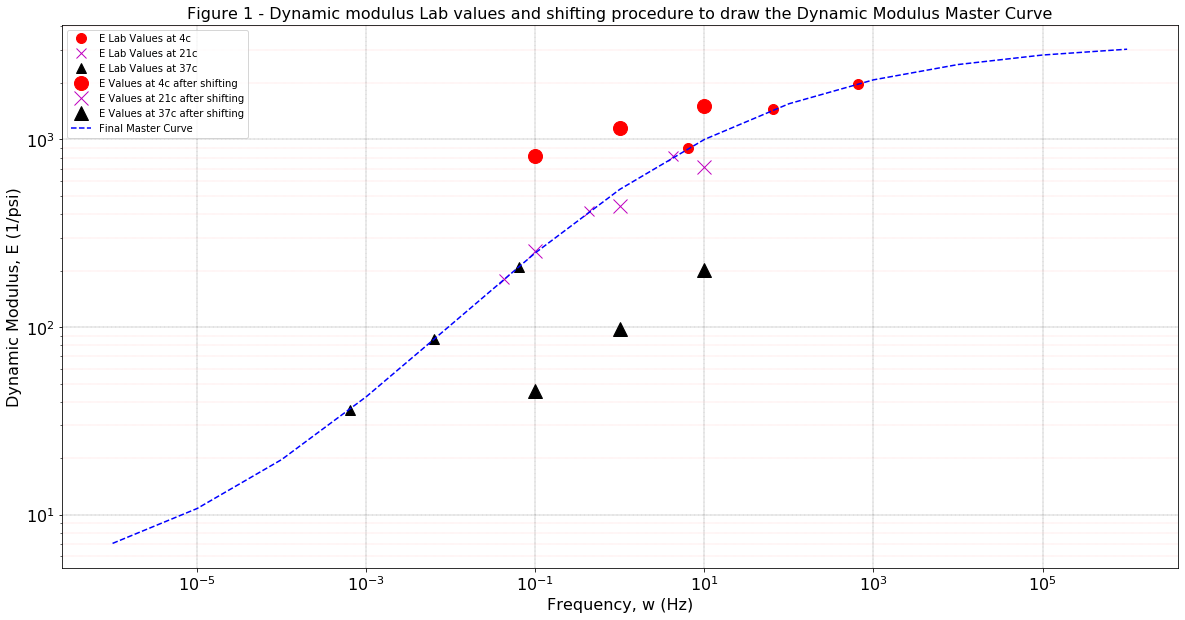

In [65]:
# Plot Figure 1 with specified size
plt.figure(figsize=(20,10))

# Plot Each Parameter with specify color, shape, and legend
plt.plot(wr_temp1,E_final_temp1, 'ro', markersize = 10, label="E Values at 4c after shifting") 
plt.plot(wr_temp2,E_final_temp2, 'mx', markersize = 10, label="E Values at 21c after shifting")
plt.plot(wr_temp3,E_final_temp3, 'k^', markersize = 10, label="E Values at 4c after shifting") 
plt.plot([0.1,1,10], [E_temp1[0][0], E_temp1[0][1], E_temp1[0][2]], 'ro', markersize=14, label="E Lab Values at 21c" )
plt.plot([0.1,1,10], [E_temp2[0][0], E_temp2[0][1], E_temp2[0][2]], 'mx', markersize=14, label="E Lab Values at 21c" )
plt.plot([0.1,1,10], [E_temp3[0][0], E_temp3[0][1], E_temp3[0][2]], 'k^', markersize=14, label="E Lab Values at 21c" )
plt.plot(wr_master,E_master, 'b--', label="Final Master Curve")

# Plot Defined legends
plt.legend()

# Plot Axis Titles
plt.ylabel("Dynamic Modulus, E (1/psi)", size=16)
plt.xlabel("Frequency, w (Hz)", size=16)

# Turn both axis to log-scale
plt.xscale('log')
plt.yscale('log')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Add title to figure 1
plt.title('Figure 1 - Dynamic modulus Lab values and shifting procedure to draw the Dynamic Modulus Master Curve', fontsize=16)

# Add grid lines
plt.grid(color='k', linestyle='--', linewidth=0.25)
plt.grid(which='minor', color='r', linestyle='--', linewidth=0.1)

plt.show()

### Dynamic modulus Master Curve Outputs
The most important part of final outputs are Dynamic modulus Master Curve Values at selected reference temprature and reduced frequencies which is shown in table 2 and figure 2. 


In [68]:

# Use DataFrame to have Master Curve Dynamic modulus values
d2= {'Reduced Frequencies (HZ)': wr_master, 'Dynamic Modulus at Refrence Tempreture(1/psi)': np.round(E_master, decimals=2)}
table2= pd.DataFrame(data=d2)
print("Table2 - Dynamic modulus values on the Master Curve in reduced frequencies and reference temperature")

# Show the DataFrame
table2

Table2 - Dynamic modulus values on the Master Curve in reduced frequencies and reference temperature


,Reduced Frequencies (HZ),Dynamic Modulus at Refrence Tempreture(1/psi)
0,0.000001,7.05
1,0.000010,10.81
2,0.000100,19.71
3,0.001000,42.57
4,0.010000,102.69
5,0.100000,248.66
6,1.000000,542.14
7,10.000000,999.59
8,100.000000,1549.02
9,1000.000000,2077.09


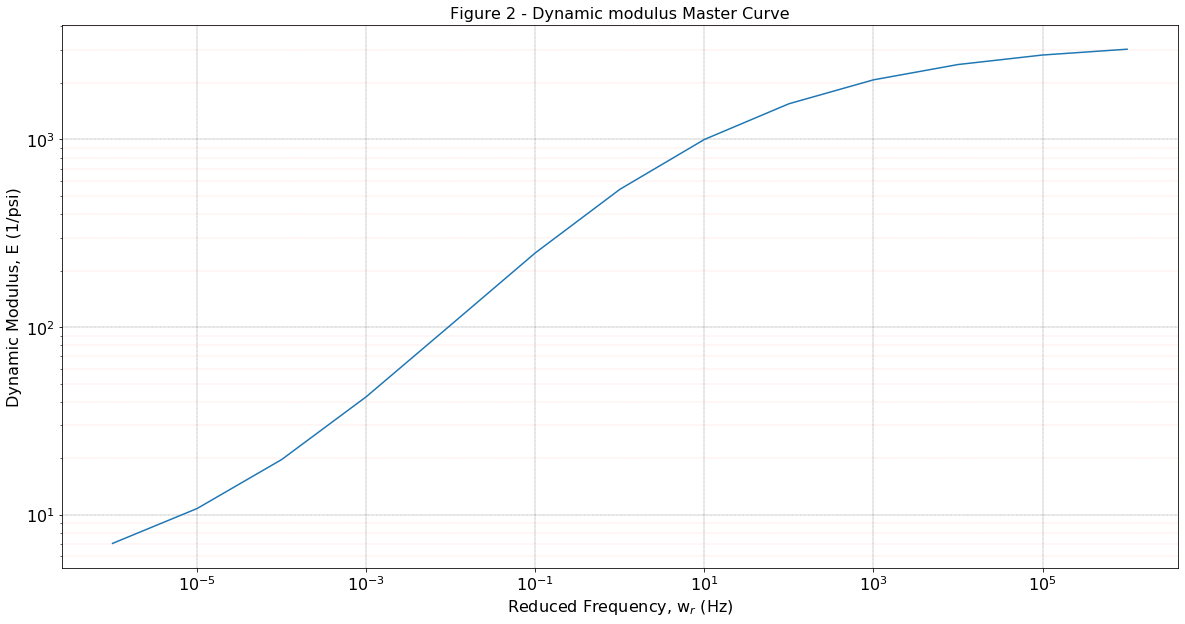

In [67]:
# Plot Figure 2 with specified size
plt.figure(figsize=(20,10))
plt.plot(wr_master,E_master)

# Plot Axis Titles
plt.ylabel("Dynamic Modulus, E (1/psi)", size=16)
plt.xlabel("Reduced Frequency, w$_r$ (Hz)", size=16)

# Turn both axis to log-scale
plt.xscale('log')
plt.yscale('log')

# Add title to figure 2
plt.title('Figure 2 - Dynamic modulus Master Curve', fontsize=16)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Add grid lines
plt.grid(color='k', linestyle='--', linewidth=0.25)
plt.grid(which='minor', color='r', linestyle='--', linewidth=0.1)



plt.show()